In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib import gridspec

from copy import copy
from matplotlib.colors import LogNorm

from matplotlib import style
style.use('/global/home/users/ftoralesacosta/dotfiles/scientific.mplstyle')

### Load Processed Data

In [79]:
#Data Unfolded From Django
cuts      = np.load('cuts.npy')
jet_pT    = np.load('jet_pT.npy')
q_perp    = np.load('q_perp.npy')
asymm_phi = np.load('asymm_angle.npy')
weights   = np.load('weights.npy')
mc_weights = np.load("mc_weights.npy")
nn_weights = np.load("nn_weights.npy")

In [80]:
#Data Unfolded From Rapgap
cuts_h1rpgp      = np.load('from_rapgap_cuts.npy')
jet_pT_h1rpgp    = np.load('from_rapgap_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp    = np.load('from_rapgap_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp = np.load('from_rapgap_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp   = np.load('from_rapgap_weights.npy')[cuts_h1rpgp]
mc_weights_h1rpgp = np.load("from_rapgap_mc_weights.npy")[cuts_h1rpgp]
nn_weights_h1rpgp = np.load("from_rapgap_nn_weights.npy")[cuts_h1rpgp]

### Load Django

In [81]:
rapgap_cuts      = np.load('rapgap_cuts.npy')
rapgap_jet_pT    = np.load('rapgap_jet_pT.npy')[rapgap_cuts]
rapgap_q_perp    = np.load('rapgap_q_perp.npy')[rapgap_cuts]
rapgap_asymm_phi = np.load('rapgap_asymm_angle.npy')[rapgap_cuts]
rapgap_weights   = np.load('rapgap_weights.npy')[rapgap_cuts]

### Apply Cuts

In [82]:
if (len(q_perp) == len(cuts)):
    jet_pT    = jet_pT[cuts]
    q_perp    = q_perp[cuts]
    asymm_phi = asymm_phi[cuts]
    weights   = weights[cuts]
    mc_weights = mc_weights[cuts]
    nn_weights = nn_weights[cuts]
    print("%i / %i Events Remain"%(len(q_perp),len(cuts)))

else:
    print("Cuts already applied!")
    

7221502 / 57882501 Events Remain


___

## Calculate Bin Average $\cos(\phi), \cos(2\phi)$, and $\cos(3\phi)$ in Bins of $q_\perp$

### Dictionaryies and Binning

In [83]:
#Make Dictionaries and Binning
N_Bins = 50
q_max = 10.00
q_perp_bins = np.linspace(0,q_max,N_Bins+1)
digits = np.digitize(q_perp,q_perp_bins)-1
keys=["q_perp","cos1","cos2","cos3"]

h1_of = dict(zip(
["q_perp","cos1","cos2","cos3"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

django = dict(zip(
["q_perp","cos1","cos2","cos3"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

rapgap = dict(zip(
["q_perp","cos1","cos2","cos3"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

h1_rpgp = dict(zip(
["q_perp","cos1","cos2","cos3"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

In [84]:
#Weighted Avg of Asymmetries in Bins of q_perp
errors = np.zeros(N_Bins)
q_w = q_perp*weights #for placing marker at bin-avg q_perp
cos1_w = np.cos(1*asymm_phi)*weights
cos2_w = np.cos(2*asymm_phi)*weights
cos3_w = np.cos(3*asymm_phi)*weights

for i in range(N_Bins):
    
    bin_mask = digits==i
    bin_wsum = np.sum(weights[bin_mask])
    errors[i] = 1/np.sqrt(np.sum(bin_wsum))
    
    h1_of["q_perp"][i] = np.sum(q_w[bin_mask])/bin_wsum
    h1_of["cos1"][i] = np.sum(cos1_w[bin_mask])/bin_wsum
    h1_of["cos2"][i] = np.sum(cos2_w[bin_mask])/bin_wsum
    h1_of["cos3"][i] = np.sum(cos3_w[bin_mask])/bin_wsum

In [85]:
def averages_in_qperp_bins(dic, N_Bins,q_perp,asymm_phi,weights,q_max=10):
    
    q_perp_bins = np.linspace(0,q_max,N_Bins+1)
    digits = np.digitize(q_perp,q_perp_bins)-1
    
    q_w = q_perp*weights
    cos1_w = np.cos(1*asymm_phi)*weights
    cos2_w = np.cos(2*asymm_phi)*weights
    cos3_w = np.cos(3*asymm_phi)*weights
    
    for i in range(N_Bins):
        bin_mask = digits==i
        bin_wsum = np.sum(weights[bin_mask])
        
        dic["q_perp"][i]  = np.nansum(q_w[bin_mask])/bin_wsum
        dic["cos1"][i] = np.nansum(cos1_w[bin_mask])/bin_wsum
        dic["cos2"][i] = np.nansum(cos2_w[bin_mask])/bin_wsum
        dic["cos3"][i] = np.nansum(cos3_w[bin_mask])/bin_wsum
        dic["errors"][i] = 1/np.sqrt(np.nansum(bin_wsum))
    return

(array([23.,  6.,  5.,  3.,  1.,  2.,  2.,  0.,  3.,  5.]),
 array([-0.05404858, -0.0358369 , -0.01762522,  0.00058646,  0.01879814,
         0.03700982,  0.0552215 ,  0.07343318,  0.09164486,  0.10985654,
         0.12806822]),
 <BarContainer object of 10 artists>)

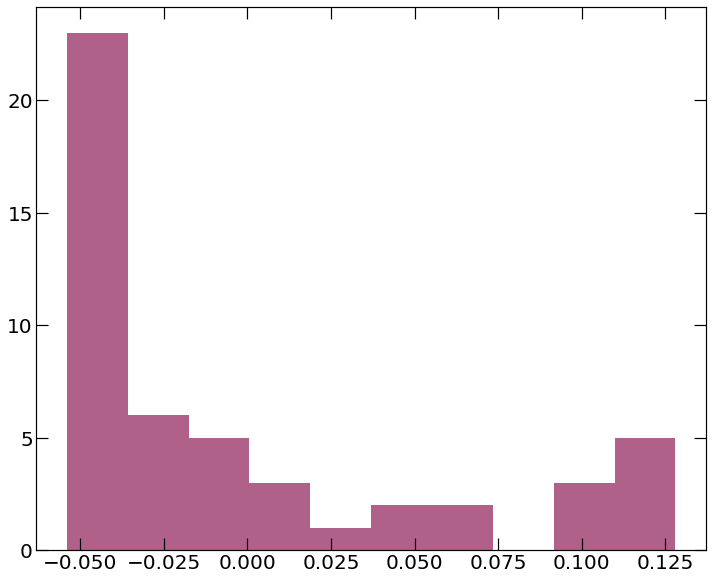

In [86]:
plt.hist(h1_of["cos1"],alpha=0.5)
h1_of = dict(zip(
["q_perp","cos1","cos2","cos3","errors"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins)]))

averages_in_qperp_bins(h1_of, N_Bins, q_perp, asymm_phi,weights)
plt.hist(h1_of["cos1"],alpha=0.5)

In [87]:
#[Django]
q_w = q_perp*mc_weights
cos1_dj = np.cos(1*asymm_phi)*mc_weights
cos2_dj = np.cos(2*asymm_phi)*mc_weights
cos3_dj = np.cos(3*asymm_phi)*mc_weights
for i in range(N_Bins):
    
    bin_mask = digits==i
    bin_sum = np.sum(mc_weights[bin_mask])
    
    
    django["q_perp"][i]= np.sum(q_w[bin_mask])/bin_sum
    django["cos1"][i] = np.sum(cos1_dj[bin_mask])/bin_sum
    django["cos2"][i] = np.sum(cos2_dj[bin_mask])/bin_sum
    django["cos3"][i] = np.sum(cos3_dj[bin_mask])/bin_sum

In [88]:
#Data unfolded USING Rapgap
h1_rpgp = dict(zip(
["q_perp","cos1","cos2","cos3","errors"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins)]))
averages_in_qperp_bins(h1_rpgp, N_Bins, q_perp_h1rpgp, asymm_phi_h1rpgp,weights_h1rpgp)

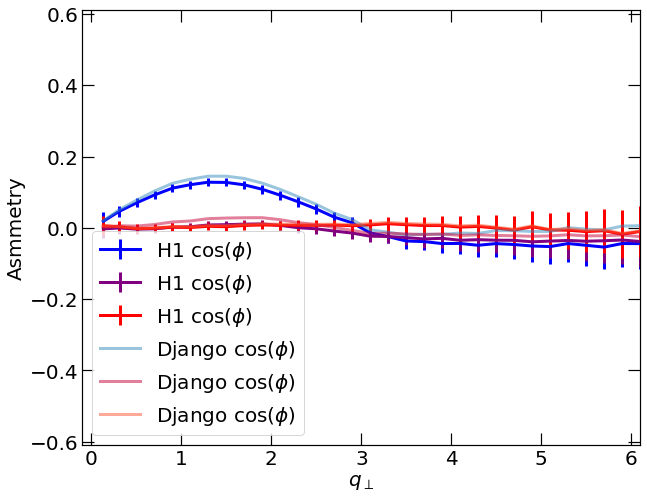

In [89]:
fig = plt.figure(figsize=(10,8))
colors=["blue","purple","red"]
for i,key in enumerate(keys[1:]):
    plt.errorbar(h1_of["q_perp"],h1_of[key],yerr=errors,label="H1 $\cos(\phi)$",color=colors[i],linewidth=3)

for i,key in enumerate(keys[1:]):
    plt.errorbar(django["q_perp"],django[key],label="Django $\cos(\phi)$",alpha=0.5,linewidth=3)

plt.xlim(-0.1,6.1)
plt.ylim(-.61,.61)
plt.legend(fontsize=20)
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)
plt.savefig("unfolded_separately.pdf")

___

In [90]:
#Rapgap
digits = np.digitize(rapgap_q_perp,q_perp_bins)-1
q_w = rapgap_q_perp*rapgap_weights
cos1_rp = np.cos(1*rapgap_asymm_phi)*rapgap_weights
cos2_rp = np.cos(2*rapgap_asymm_phi)*rapgap_weights  
cos3_rp = np.cos(3*rapgap_asymm_phi)*rapgap_weights
for i in range(N_Bins):
    
    bin_mask = digits==i
    bin_sum = np.sum(rapgap_weights[bin_mask])

    rapgap["q_perp"][i]= np.nansum(q_w[bin_mask])/bin_sum
    rapgap["cos1"][i] = np.nansum(cos1_rp[bin_mask])/bin_sum
    rapgap["cos2"][i] = np.nansum(cos2_rp[bin_mask])/bin_sum
    rapgap["cos3"][i] = np.nansum(cos3_rp[bin_mask])/bin_sum

## Theory https://arxiv.org/pdf/2106.05307.pdf

In [91]:
theory = {}

for i in range(1,4):
    key = "cos%i"%(i)
    theory[key] = np.load("theory_cos%iphi.npy"%(i))
    key = key+"_x"
    theory[key] = np.load("theory_cos%iphi_x.npy"%(i))

## Pythia [Roli+Kyle]

In [92]:
pythia = {}

for i in range(1,4):
    key = "cos%i"%(i)
    pythia[key] = genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,1]
    key = key+"_x"
    pythia[key] = genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,0]

___

## Overlay Everything

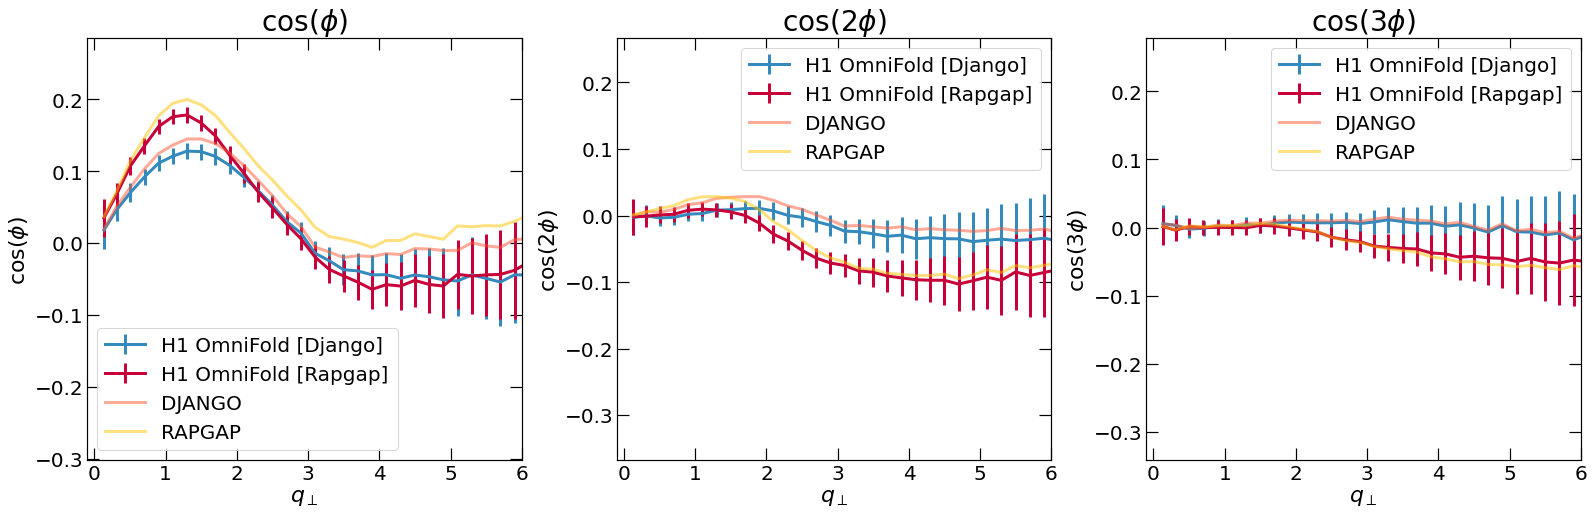

In [95]:
plot_data = True
plot_theory = False
plot_pythia = False
plot_django = True
plot_rapgap = True
plot_h1rpgp = True

#fig = plt.figure(figsize=(10,8))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), constrained_layout=True)

if (plot_data):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(h1_of["q_perp"],h1_of[key],yerr=errors,label="H1 OmniFold [Django] ",linewidth=3)
        
if (plot_h1rpgp):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=errors,label="H1 OmniFold [Rapgap]",linewidth=3)
        
if (plot_django):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(django["q_perp"],django[key],label="DJANGO",linewidth=3,alpha=0.5)
        
if (plot_rapgap):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(rapgap["q_perp"],rapgap[key],label="RAPGAP",linewidth=3,alpha=0.5)


if (plot_theory):
    axes[0].plot(theory['cos1_x'],theory['cos1'],label="Theory [$\cos\phi$]",linewidth=4,linestyle="solid",color="blue")
    axes[1].plot(theory['cos2_x'],theory['cos2'],label="Theory [$\cos2\phi$]",linewidth=4,linestyle="solid",color="purple")
    axes[2].plot(theory['cos3_x'],theory['cos3'],label="Theory [$\cos3\phi$]",linewidth=4,linestyle="solid",color="red")
    
if (plot_pythia):
    axes[0].plot(pythia['cos1_x'],pythia['cos1'],label="Pythia [$\cos\phi$]",linewidth=4,linestyle="dashed",color="blue")
    axes[1].plot(pythia['cos2_x'],pythia['cos2'],label="Pythia [$\cos2\phi$]",linewidth=4,linestyle="dashed",color="purple")
    axes[2].plot(pythia['cos3_x'],pythia['cos3'],label="Pythia [$\cos3\phi$]",linewidth=4,linestyle="dashed",color="red")

#plt.xlim(-0.1,6.1)
#plt.ylim(-1.61,0.61)
for i in range(3):
    string = r"$\cos(%i\phi)$"%(i+1)
    if i ==0:
        string = r"$\cos(\phi)$"
        
    axes[i].legend()
    axes[i].set_title(string)
    #axes[i].set_ylim(-0.15,0.3)
    axes[i].set_xlim(-0.1,6.0)
    axes[i].set_ylabel(string)
    axes[i].set_xlabel(r"$q_\perp$")


string = ""
theory_string = ""
pythia_sttring = ""
if (plot_data):
        string = "Unfolded H1, "
        
if (plot_django):
        string += "Django, "

if (plot_theory and plot_pythia):
    string += " Theory, and Pythia"

elif (plot_theory):
    string += "and Theory"

elif (plot_pythia):
    string += "and Pythia"
    
    
plt.savefig(string+".pdf")

### 2D Asymmetry Histograms

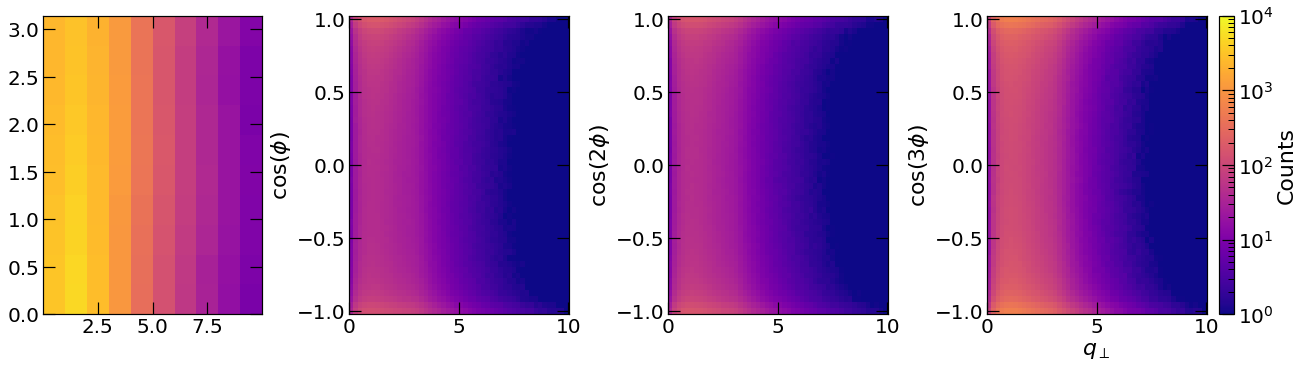

In [70]:
N_Bins = 51
xbins = np.linspace(-0.01,10.01,N_Bins)
ybins = np.linspace(-1.02,1.02,N_Bins)
cmap = copy(plt.cm.plasma)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), constrained_layout=True)


h0, xedges0, yedges0 = np.histogram2d(q_perp, (asymm_phi), weights=weights)
h1, xedges1, yedges1 = np.histogram2d(q_perp, np.cos(asymm_phi),bins=(xbins,ybins), weights=weights)
h2, xedges2, yedges2 = np.histogram2d(q_perp, np.cos(2*asymm_phi), bins=(xbins,ybins), weights=weights)
h3, xedges3, yedges3 = np.histogram2d(q_perp, np.cos(3*asymm_phi), bins=(xbins,ybins), weights=weights)

pcm = axes[0].pcolormesh(xedges0, yedges0, h0.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[1].pcolormesh(xedges1, yedges1, h1.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
axes[2].pcolormesh(xedges2, yedges2, h2.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
axes[3].pcolormesh(xedges3, yedges3, h3.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)

axes[1].set_ylabel("$\cos(\phi)$",fontsize=22)
axes[2].set_ylabel("$\cos(2\phi)$",fontsize=22)
axes[3].set_ylabel("$\cos(3\phi)$",fontsize=22)

cb = fig.colorbar(pcm, ax=axes, pad=0)

plt.xlabel("$q_\perp$",fontsize=22)
cb.set_label("Counts",fontsize=22)
plt.savefig("2D_asymmetries.png")